<a href="https://colab.research.google.com/github/priyanu17/employee_retension_analysis/blob/master/Employee_Retention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [380]:
import warnings
warnings.filterwarnings("ignore")

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [382]:
hr_data = pd.read_csv("Case_Study_1_hr_data.csv")

In [383]:
# head of dataset
hr_data.head(10)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
5,1060,2,153,3,0,1,0,sales,low
6,1061,6,247,4,0,1,0,sales,low
7,1576,5,259,5,0,1,0,sales,low
8,1752,5,224,5,0,1,0,sales,low
9,1988,2,142,3,0,1,0,sales,low


In [384]:
# last 10 rows:
hr_data.tail(10)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14989,87638,2,159,3,1,1,0,technical,low
14990,87639,5,228,5,1,1,0,support,low
14991,87654,6,257,4,0,1,0,support,low
14992,87656,2,155,3,0,1,0,support,low
14993,87661,6,293,6,0,1,0,support,low
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [385]:
# shape of data:
hr_data.shape

(14999, 9)

In [386]:
# data contains 14999 rows and 9 columns

In [387]:
# info on dataset:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [388]:
# describe on data:
hr_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,14999.0,45424.627575,25915.900127,1003.0,22872.5,45448.0,67480.5,99815.0
number_project,14999.0,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,0.144610,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999.0,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0


In [389]:
# datatypes:
hr_data.dtypes

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

In [390]:
# All numeric columns except for last two
hr_data.select_dtypes(include = ['object']).columns

Index(['department', 'salary'], dtype='object')

In [391]:
# columns in the dataset:
hr_data.columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [392]:
# moving target column to the end:
cols_at_end = ["left"]
hr_data = hr_data[[c for c in hr_data if c not in cols_at_end] 
        + [c for c in cols_at_end if c in hr_data]]

In [393]:
hr_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,1003,2,157,3,0,0,sales,low,1
1,1005,5,262,6,0,0,sales,medium,1
2,1486,7,272,4,0,0,sales,medium,1
3,1038,5,223,5,0,0,sales,low,1
4,1057,2,159,3,0,0,sales,low,1


In [394]:
# checking for duplicate rows:
hr_data.duplicated(keep = "first").value_counts()

False    14999
dtype: int64

In [395]:
# no duplicate rows are present

In [396]:
# fuction to check for constant feature columns in the data
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [397]:
# we remove constant feature columns from the dataset,
# as correlation with target variable is 0
find_constant_features(hr_data)

[]

In [398]:
# no constant features found

In [399]:
# checking for null values:
hr_data.isna().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

In [400]:
# no null values

In [401]:
((hr_data.isna().sum()/len(hr_data))*100).round(2)

employee_id              0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
left                     0.0
dtype: float64

In [402]:
# categorical columns value_counts

In [403]:
hr_data["department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [404]:
hr_data["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [405]:
# target variable 
hr_data["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

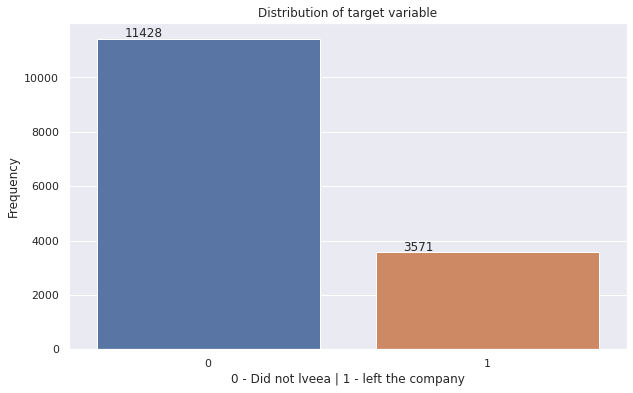

In [406]:
sns.set(style="darkgrid")

plt.figure(figsize=(10,6))
ax = sns.countplot(x="left", data=hr_data)
plt.title('Distribution of target variable')
plt.xlabel('0 - Did not lveea | 1 - left the company')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

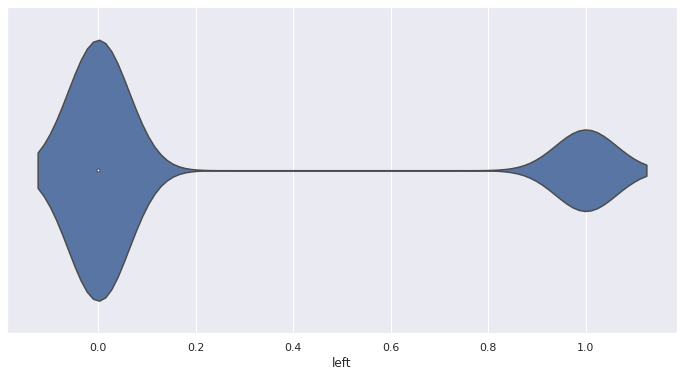

In [407]:
# another plot of the TARGET variable "left"

sns.set(style="darkgrid")
plt.figure(figsize = (12, 6))
sns.violinplot(x = hr_data["left"])
plt.show()

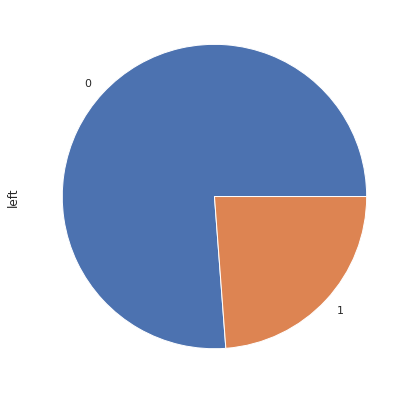

In [408]:
plt.figure(figsize = (7, 7))
hr_data["left"].value_counts().plot.pie()
plt.show()

In [409]:
# second dataset:

emp_satisfaction_eval = pd.read_excel("Case_Study_1_employee_satisfaction_level.xlsx")

In [410]:
emp_satisfaction_eval.head(10)

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
5,1060,0.41,0.50
6,1061,0.10,0.77
7,1576,0.92,0.85
8,1752,0.89,1.00
9,1988,0.42,0.53


In [411]:
emp_satisfaction_eval.shape

(14999, 3)

In [412]:
emp_satisfaction_eval.columns 

Index(['EMPLOYEE #', 'satisfaction_level', 'last_evaluation'], dtype='object')

In [413]:
# same number of rows as in the previous dataset

In [414]:
# merge two tables 

In [415]:
merge_data = pd.merge(hr_data, emp_satisfaction_eval, left_on = 'employee_id', right_on = 'EMPLOYEE #')

In [416]:
merge_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,2,157,3,0,0,sales,low,1,1003,0.38,0.53
1,1005,5,262,6,0,0,sales,medium,1,1005,0.80,0.86
2,1486,7,272,4,0,0,sales,medium,1,1486,0.11,0.88
3,1038,5,223,5,0,0,sales,low,1,1038,0.72,0.87
4,1057,2,159,3,0,0,sales,low,1,1057,0.37,0.52


In [417]:
merge_data = merge_data.drop(columns = ["EMPLOYEE #"])

In [418]:
merge_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,satisfaction_level,last_evaluation
0,1003,2,157,3,0,0,sales,low,1,0.38,0.53
1,1005,5,262,6,0,0,sales,medium,1,0.80,0.86
2,1486,7,272,4,0,0,sales,medium,1,0.11,0.88
3,1038,5,223,5,0,0,sales,low,1,0.72,0.87
4,1057,2,159,3,0,0,sales,low,1,0.37,0.52


In [419]:
# two new parameters included in the dataset 

# "satisfaction_level" , "last_evaluation"

In [420]:
merge_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,14999.0,45424.627575,25915.900127,1003.00,22872.50,45448.00,67480.50,99815.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
satisfaction_level,14972.0,0.612830,0.248714,0.09,0.44,0.64,0.82,1.0
last_evaluation,14972.0,0.716125,0.171138,0.36,0.56,0.72,0.87,1.0


In [421]:
merge_data.isna().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
department                0
salary                    0
left                      0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [422]:
# 27 rows have empty values 

In [423]:
# rows with null values
merge_data[merge_data.isnull().any(axis = 1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,sales,low,1,NaN,NaN
19,1140,5,262,5,0,0,sales,low,1,NaN,0.89
33,1230,2,140,3,0,0,hr,low,1,NaN,NaN
53,1340,2,132,3,0,0,support,low,1,NaN,NaN
72,22316,2,149,3,0,0,product_mng,high,1,NaN,NaN
92,1581,2,143,3,0,0,sales,low,1,NaN,NaN
107,17376,2,148,3,0,0,accounting,medium,1,NaN,NaN
120,1739,4,158,4,1,0,technical,low,1,NaN,NaN
137,1847,2,129,3,0,0,management,low,1,NaN,NaN
175,32923,4,164,2,0,0,sales,low,1,NaN,NaN


In [424]:
# null values in percentage
((merge_data.isna().sum()/len(merge_data))*100).round(2)

employee_id              0.00
number_project           0.00
average_montly_hours     0.00
time_spend_company       0.00
Work_accident            0.00
promotion_last_5years    0.00
department               0.00
salary                   0.00
left                     0.00
satisfaction_level       0.18
last_evaluation          0.18
dtype: float64

In [425]:
merge_data.mean()

employee_id              45424.627575
number_project               3.803054
average_montly_hours       201.050337
time_spend_company           3.498233
Work_accident                0.144610
promotion_last_5years        0.021268
left                         0.238083
satisfaction_level           0.612830
last_evaluation              0.716125
dtype: float64

In [426]:
# since, the percentage is small(0.18%), we fill with mean values of corresponding columns
merge_data = merge_data.fillna(merge_data.mean())

In [427]:
merge_data.isna().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [428]:
# now we have no null values

In [429]:
merge_data.shape

(14999, 11)

In [430]:
# drop employee_id from data:
merge_data = merge_data.drop(columns = ["employee_id"])

In [431]:
merge_data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,satisfaction_level,last_evaluation
0,2,157,3,0,0,sales,low,1,0.38,0.53
1,5,262,6,0,0,sales,medium,1,0.80,0.86
2,7,272,4,0,0,sales,medium,1,0.11,0.88
3,5,223,5,0,0,sales,low,1,0.72,0.87
4,2,159,3,0,0,sales,low,1,0.37,0.52


In [432]:
# moving target column to the end:
cols_at_end = ["left"]
merge_data = merge_data[[c for c in merge_data if c not in cols_at_end] 
        + [c for c in cols_at_end if c in merge_data]]

In [433]:
merge_data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,left
0,2,157,3,0,0,sales,low,0.38,0.53,1
1,5,262,6,0,0,sales,medium,0.80,0.86,1
2,7,272,4,0,0,sales,medium,0.11,0.88,1
3,5,223,5,0,0,sales,low,0.72,0.87,1
4,2,159,3,0,0,sales,low,0.37,0.52,1


In [434]:
merge_data.groupby("department").sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,left
department,,,,,,,,
IT,4683,248119,4256,164,3,758.17283,879.452250,273
RandD,3033,158030,2650,134,27,487.80000,560.446125,121
accounting,2934,154292,2702,96,14,446.68283,550.706125,204
hr,2701,146828,2480,89,15,442.53566,524.006125,215
management,2432,126787,2711,103,69,391.76566,456.234499,91
marketing,3164,171073,3063,138,43,530.62283,613.946125,203
product_mng,3434,180369,3135,132,0,559.19566,644.662250,198
sales,15634,831773,14631,587,100,2543.77981,2938.236749,1014
support,8479,447490,7563,345,20,1377.90849,1611.534499,555


In [435]:
merge_data.groupby("department").mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,left
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.002445,0.617908,0.716750,0.222494
RandD,3.853875,200.800508,3.367217,0.170267,0.034307,0.619822,0.712130,0.153748
accounting,3.825293,201.162973,3.522816,0.125163,0.018253,0.582377,0.718000,0.265971
hr,3.654939,198.684709,3.355886,0.120433,0.020298,0.598830,0.709075,0.290934
management,3.860317,201.249206,4.303175,0.163492,0.109524,0.621850,0.724182,0.144444
marketing,3.687646,199.385781,3.569930,0.160839,0.050117,0.618442,0.715555,0.236597
product_mng,3.807095,199.965632,3.475610,0.146341,0.000000,0.619951,0.714703,0.219512
sales,3.776329,200.911353,3.534058,0.141787,0.024155,0.614440,0.709719,0.244928
support,3.803948,200.758188,3.393001,0.154778,0.008973,0.618173,0.722985,0.248991


In [436]:
# proojects done department wise
merge_data.groupby("department")["number_project"].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: number_project, dtype: int64

In [437]:
# time spent in company department wise
merge_data.groupby("department")["time_spend_company"].sum()

department
IT              4256
RandD           2650
accounting      2702
hr              2480
management      2711
marketing       3063
product_mng     3135
sales          14631
support         7563
technical       9279
Name: time_spend_company, dtype: int64

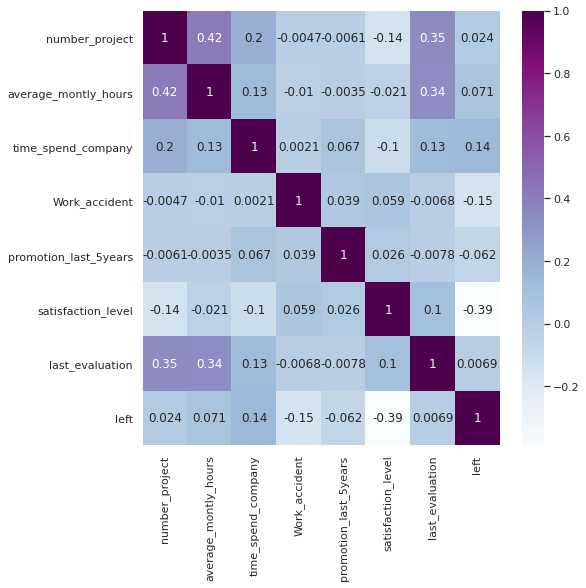

In [438]:
# Correlation matrix function:

plt.figure(figsize = (8, 8))
sns.heatmap(merge_data.corr(), cmap = "BuPu", annot = True)
plt.show()

In [439]:
# One-Hot-Encoding using pandas:

categorical_columns = merge_data.select_dtypes(include = ["object"]).columns
merge_data_final = pd.get_dummies(merge_data, columns = categorical_columns , drop_first = True)

In [440]:
# no categorical columns
merge_data_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,0,0.38,0.53,1,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,0,0.80,0.86,1,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,0,0.11,0.88,1,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,0,0.72,0.87,1,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,0,0.37,0.52,1,0,0,0,0,0,0,1,0,0,1,0


In [441]:
merge_data_final.shape

(14999, 19)

In [442]:
# dataset now has 19 columns

In [443]:
# spiltting data into dependent and independent variables:

X = merge_data_final.drop(columns = ["left"]).values

y = merge_data_final['left'].values


In [444]:
len(X)

14999

In [445]:
len(y)

14999

In [446]:
# split into train and test data
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [447]:
# Feature Scaling:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [448]:
# Scaled train data:
df_train = pd.DataFrame(X_train)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.169526,0.321971,-0.334991,-0.414128,-0.146297,0.750242,0.908643,-0.238486,-0.235797,-0.225723,-0.202611,-0.244669,-0.252658,-0.625124,-0.418852,-0.463552,-0.974884,1.141012
1,0.169526,0.442321,0.360082,-0.414128,-0.146297,0.184019,0.031475,-0.238486,-0.235797,-0.225723,-0.202611,-0.244669,-0.252658,-0.625124,-0.418852,-0.463552,1.025763,-0.876415
2,0.981130,0.803369,0.360082,-0.414128,-0.146297,0.062686,1.668855,4.193125,-0.235797,-0.225723,-0.202611,-0.244669,-0.252658,-0.625124,-0.418852,-0.463552,-0.974884,1.141012
3,-1.453683,-0.179485,-0.334991,-0.414128,-0.146297,0.709797,0.674731,-0.238486,-0.235797,-0.225723,-0.202611,-0.244669,-0.252658,-0.625124,2.387481,-0.463552,1.025763,-0.876415
4,-0.642079,1.224592,-1.030065,-0.414128,-0.146297,1.276020,1.025599,-0.238486,-0.235797,-0.225723,-0.202611,-0.244669,-0.252658,1.599682,-0.418852,-0.463552,1.025763,-0.876415
5,0.169526,-0.139368,-0.334991,-0.414128,-0.146297,-0.503537,0.674731,-0.238486,-0.235797,-0.225723,-0.202611,-0.244669,-0.252658,-0.625124,-0.418852,2.157253,-0.974884,1.141012
6,-0.642079,-0.019019,-0.334991,-0.414128,-0.146297,0.669353,1.259510,4.193125,-0.235797,-0.225723,-0.202611,-0.244669,-0.252658,-0.625124,-0.418852,-0.463552,1.025763,-0.876415
7,0.169526,0.642903,-0.334991,-0.414128,-0.146297,-0.018203,-0.553303,-0.238486,-0.235797,-0.225723,-0.202611,4.087162,-0.252658,-0.625124,-0.418852,-0.463552,-0.974884,1.141012
8,-0.642079,-0.480359,-0.334991,-0.414128,-0.146297,0.992909,0.733209,-0.238486,-0.235797,-0.225723,-0.202611,-0.244669,-0.252658,1.599682,-0.418852,-0.463552,-0.974884,1.141012
9,-0.642079,0.221680,-1.030065,-0.414128,-0.146297,1.235575,1.668855,-0.238486,-0.235797,-0.225723,-0.202611,-0.244669,-0.252658,-0.625124,2.387481,-0.463552,1.025763,-0.876415


In [449]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,10499.0,-1.650689e-16,1.000048,-1.453683,-0.642079,0.169526,0.981130,2.604338
1,10499.0,-3.897783e-17,1.000048,-2.105077,-0.901582,-0.019019,0.883602,2.187388
2,10499.0,-3.234864e-16,1.000048,-1.030065,-0.334991,-0.334991,0.360082,4.530524
3,10499.0,7.473359e-16,1.000048,-0.414128,-0.414128,-0.414128,-0.414128,2.414713
4,10499.0,-1.027244e-15,1.000048,-0.146297,-0.146297,-0.146297,-0.146297,6.835402
5,10499.0,2.819207e-14,1.000048,-2.121316,-0.705759,0.103130,0.831131,1.559131
6,10499.0,2.708458e-14,1.000048,-2.073728,-0.904171,0.031475,0.908643,1.668855
7,10499.0,-7.446658e-16,1.000048,-0.238486,-0.238486,-0.238486,-0.238486,4.193125
8,10499.0,-5.076053e-16,1.000048,-0.235797,-0.235797,-0.235797,-0.235797,4.240935
9,10499.0,9.782525e-17,1.000048,-0.225723,-0.225723,-0.225723,-0.225723,4.430205


In [450]:
# Model 1 : Logistic Regression 

from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()

In [451]:
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [452]:
y_predict = log_reg_model.predict(X_test)

In [453]:
from sklearn.metrics import accuracy_score
print("Accuracy of model is : " + str( accuracy_score(y_test, y_predict)*100))

Accuracy of model is : 79.82222222222222


In [454]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for the model is : ")
print(confusion_matrix(y_test, y_predict))

Confusion matrix for the model is : 
[[3163  273]
 [ 635  429]]


In [455]:
from sklearn.metrics import classification_report
print("Calssification Report for the model is : \n")
print(classification_report(y_test, y_predict))

Calssification Report for the model is : 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3436
           1       0.61      0.40      0.49      1064

    accuracy                           0.80      4500
   macro avg       0.72      0.66      0.68      4500
weighted avg       0.78      0.80      0.78      4500



In [456]:
# Model 2: Random Forest Calssifier

from sklearn.ensemble import RandomForestClassifier

ran_for_model = RandomForestClassifier(n_estimators = 50)

In [457]:
ran_for_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [458]:
y_predict_r = ran_for_model.predict(X_test)

In [459]:
from sklearn.metrics import accuracy_score
print("Accuracy of model is : " + str( accuracy_score(y_test, y_predict_r)*100))

Accuracy of model is : 98.66666666666667


In [460]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for the model is : \n")
print(confusion_matrix(y_test, y_predict_r))

Confusion matrix for the model is : 

[[3425   11]
 [  49 1015]]


In [461]:
from sklearn.metrics import classification_report
print("Calssification Report for the model is : \n")
print(classification_report(y_test, y_predict_r))

Calssification Report for the model is : 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3436
           1       0.99      0.95      0.97      1064

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [462]:
# Rank columns in terms of feature importances:

feature_importances = pd.DataFrame(ran_for_model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                   columns = ["importance"]).sort_values('importance', ascending = False)

In [463]:
feature_importances

,importance
5,0.333597
0,0.185332
2,0.176062
1,0.141277
6,0.119894
3,0.009301
16,0.006917
15,0.004094
17,0.004081
13,0.004053


In [464]:
# 5th column is the most important : "satisfaction_level"

In [465]:
# Creating Deep Learning Classification models:

In [466]:
# import tensorflow
import tensorflow as tf

%tensorflow_version 2.x
print(tf.__version__)

2.2.0


In [467]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  

In [468]:
# create model
deep_classifier = Sequential()

# add layers
deep_classifier.add(Dense( 32, kernel_initializer= 'uniform' , activation = 'relu', input_dim = 18) )
deep_classifier.add(Dense( 32, kernel_initializer= 'uniform' , activation = 'relu') )
deep_classifier.add(Dense( 32, kernel_initializer= 'uniform' , activation = 'relu') )

# output layer
deep_classifier.add(Dense( 1, kernel_initializer= 'uniform' , activation = 'sigmoid') )


In [469]:
# compile the model
deep_classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [470]:
# summary of the model
deep_classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [471]:
# trainigng the model
history = deep_classifier.fit(X_train,
                              y_train,
                              batch_size = 32,
                              epochs = 25,
                              verbose = 2,
                              validation_data = (X_test, y_test) )


Epoch 1/25
329/329 - 1s - loss: 0.4028 - accuracy: 0.8163 - val_loss: 0.2570 - val_accuracy: 0.9138
Epoch 2/25
329/329 - 1s - loss: 0.1944 - accuracy: 0.9403 - val_loss: 0.1532 - val_accuracy: 0.9509
Epoch 3/25
329/329 - 1s - loss: 0.1489 - accuracy: 0.9591 - val_loss: 0.1416 - val_accuracy: 0.9580
Epoch 4/25
329/329 - 1s - loss: 0.1387 - accuracy: 0.9620 - val_loss: 0.1374 - val_accuracy: 0.9582
Epoch 5/25
329/329 - 1s - loss: 0.1313 - accuracy: 0.9625 - val_loss: 0.1303 - val_accuracy: 0.9611
Epoch 6/25
329/329 - 1s - loss: 0.1257 - accuracy: 0.9640 - val_loss: 0.1396 - val_accuracy: 0.9589
Epoch 7/25
329/329 - 1s - loss: 0.1218 - accuracy: 0.9651 - val_loss: 0.1252 - val_accuracy: 0.9629
Epoch 8/25
329/329 - 1s - loss: 0.1203 - accuracy: 0.9662 - val_loss: 0.1261 - val_accuracy: 0.9616
Epoch 9/25
329/329 - 1s - loss: 0.1169 - accuracy: 0.9674 - val_loss: 0.1270 - val_accuracy: 0.9618
Epoch 10/25
329/329 - 1s - loss: 0.1131 - accuracy: 0.9682 - val_loss: 0.1264 - val_accuracy: 0.9616

In [472]:
deep_classifier_test_score = deep_classifier.evaluate(X_test, y_test, verbose = 1)

141/141 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9644


In [473]:
print("Test loss is : " + str(deep_classifier_test_score[0]))

Test loss is : 0.122513547539711


In [474]:
print("Test accuracy is : " + str(deep_classifier_test_score[1]*100))

Test accuracy is : 96.44444584846497


In [475]:
deep_classifier.predict(X_test)

array([[9.9704599e-01],
       [7.1654307e-05],
       [8.1160665e-03],
       ...,
       [2.8031494e-03],
       [9.9949491e-01],
       [9.9981958e-01]], dtype=float32)

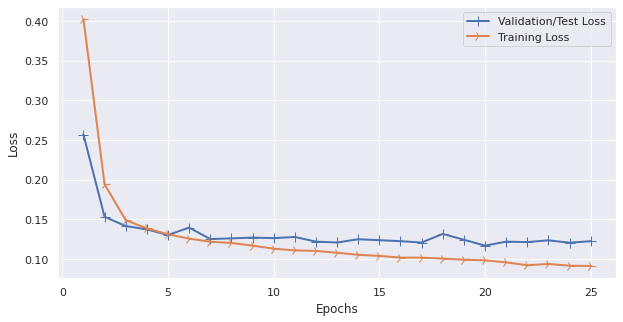

In [476]:
# Training vs Validation loss:

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize = (10, 5))

validation_line = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
train_line = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(validation_line , linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(train_line, linewidth = 2.0, marker = '4', markersize = 10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

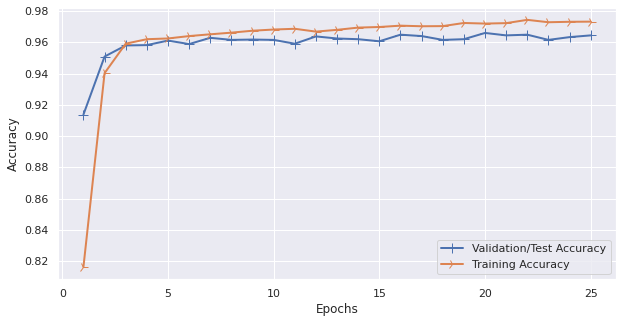

In [477]:
# Training vs Validation Accuracy:

history_dict = history.history

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(accuracy_values) + 1)

plt.figure(figsize = (10, 5))

validation_line = plt.plot(epochs, val_accuracy_values, label = 'Validation/Test Accuracy')
train_line = plt.plot(epochs, accuracy_values, label = 'Training Accuracy')

plt.setp(validation_line , linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(train_line, linewidth = 2.0, marker = '4', markersize = 10.0)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [478]:
predictions = deep_classifier.predict(X_test)
predictions = (predictions > 0.5)

In [479]:
print("Confusion Matrix for the model : \n")
print(confusion_matrix(y_test, predictions))

Confusion Matrix for the model : 

[[3369   67]
 [  93  971]]


In [480]:
print("Classification Report of model : \n")
print(classification_report(y_test, predictions))

Classification Report of model : 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3436
           1       0.94      0.91      0.92      1064

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [481]:
# Random Forest Classifier provides highest accuracy : 98.67%
# Deep Learning classifier provides decent accuracy : 96.44%